#1. Import Dataset


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#2. Load Dataset

In [21]:
data=pd.read_excel('OSN Dataset Datmin.xlsx')
data

,No,Nama Peserta,Gender,Sekolah,Provinsi,Kab/Kota,Bidang,Jenjang Lomba,Jenjang Sekolah,Kelas,Medali,Tahun
0,0,Gangsar Lintas Damai,L,MA Amanatul Ummah,Jawa Timur,Kota Surabaya,Biologi,SMA,SMA,11.0,Partisipan,2016
1,1,Muhammad Khairul Ihsan,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Ekonomi,SMA,SMA,11.0,Partisipan,2021
2,2,Farhannur,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Ekonomi,SMA,SMA,11.0,Emas,2022
3,3,Muhammad Fathoni,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Fisika,SMA,SMA,11.0,Partisipan,2022
4,4,Rahmat MI,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Kimia,SMA,SMA,11.0,Partisipan,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
246,246,Mohammad Eldivo Alsyawal Otoluwa,L,MAN Insan Cendekia Gorontalo,Gorontalo,Kab. Bone Bolango,Astronomi,SMA,SMA,11.0,Perak,2021
247,247,Yasmin Ainurrahmah,P,MAN Insan Cendekia Gorontalo,Gorontalo,Kab. Bone Bolango,Biologi,SMA,SMA,11.0,Partisipan,2021
248,248,Mohammad Fairuz Alauddin Yahya,L,MAN Insan Cendekia Gorontalo,Gorontalo,Kab. Bone Bolango,Fisika,SMA,SMA,11.0,Partisipan,2021
249,249,Anas Fathurrahman,L,MAN Insan Cendekia Gorontalo,Gorontalo,Kab. Bone Bolango,Fisika,SMA,SMA,11.0,Perunggu,2021


#3. Preprocessing

In [22]:
data.isnull().sum()

,0
No,0
Nama Peserta,0
Gender,0
Sekolah,0
Provinsi,0
Kab/Kota,0
Bidang,0
Jenjang Lomba,0
Jenjang Sekolah,0
Kelas,28


In [23]:
data.describe()

,No,Kelas,Tahun
count,251.000000,223.000000,251.000000
mean,125.000000,10.600897,2019.266932
std,72.601653,0.858135,3.755058
min,0.000000,7.000000,2009.000000
25%,62.500000,10.000000,2018.000000
50%,125.000000,11.000000,2020.000000
75%,187.500000,11.000000,2022.000000
max,250.000000,11.000000,2024.000000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               251 non-null    int64  
 1   Nama Peserta     251 non-null    object 
 2   Gender           251 non-null    object 
 3   Sekolah          251 non-null    object 
 4   Provinsi         251 non-null    object 
 5   Kab/Kota         251 non-null    object 
 6   Bidang           251 non-null    object 
 7   Jenjang Lomba    251 non-null    object 
 8   Jenjang Sekolah  251 non-null    object 
 9   Kelas            223 non-null    float64
 10  Medali           251 non-null    object 
 11  Tahun            251 non-null    int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 23.7+ KB


In [25]:
data['Kelas'].fillna(data['Kelas'].median(), inplace=True)
data

<ipython-input-25-c2ca96fd97fb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Kelas'].fillna(data['Kelas'].median(), inplace=True)


,No,Nama Peserta,Gender,Sekolah,Provinsi,Kab/Kota,Bidang,Jenjang Lomba,Jenjang Sekolah,Kelas,Medali,Tahun
0,0,Gangsar Lintas Damai,L,MA Amanatul Ummah,Jawa Timur,Kota Surabaya,Biologi,SMA,SMA,11.0,Partisipan,2016
1,1,Muhammad Khairul Ihsan,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Ekonomi,SMA,SMA,11.0,Partisipan,2021
2,2,Farhannur,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Ekonomi,SMA,SMA,11.0,Emas,2022
3,3,Muhammad Fathoni,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Fisika,SMA,SMA,11.0,Partisipan,2022
4,4,Rahmat MI,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Kimia,SMA,SMA,11.0,Partisipan,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
246,246,Mohammad Eldivo Alsyawal Otoluwa,L,MAN Insan Cendekia Gorontalo,Gorontalo,Kab. Bone Bolango,Astronomi,SMA,SMA,11.0,Perak,2021
247,247,Yasmin Ainurrahmah,P,MAN Insan Cendekia Gorontalo,Gorontalo,Kab. Bone Bolango,Biologi,SMA,SMA,11.0,Partisipan,2021
248,248,Mohammad Fairuz Alauddin Yahya,L,MAN Insan Cendekia Gorontalo,Gorontalo,Kab. Bone Bolango,Fisika,SMA,SMA,11.0,Partisipan,2021
249,249,Anas Fathurrahman,L,MAN Insan Cendekia Gorontalo,Gorontalo,Kab. Bone Bolango,Fisika,SMA,SMA,11.0,Perunggu,2021


In [26]:
data.isnull().sum()

,0
No,0
Nama Peserta,0
Gender,0
Sekolah,0
Provinsi,0
Kab/Kota,0
Bidang,0
Jenjang Lomba,0
Jenjang Sekolah,0
Kelas,0


In [27]:
kolom= ["Gender","Provinsi","Kab/Kota","Bidang","Jenjang Lomba","Jenjang Sekolah","Medali"]
label_encoder = {col: LabelEncoder() for col in kolom}
for col in kolom:
    data[col] = label_encoder[col].fit_transform(data[col])
data

,No,Nama Peserta,Gender,Sekolah,Provinsi,Kab/Kota,Bidang,Jenjang Lomba,Jenjang Sekolah,Kelas,Medali,Tahun
0,0,Gangsar Lintas Damai,0,MA Amanatul Ummah,9,38,1,0,0,11.0,2,2016
1,1,Muhammad Khairul Ihsan,0,MAN 1 Banda Aceh,0,20,2,0,0,11.0,2,2021
2,2,Farhannur,0,MAN 1 Banda Aceh,0,20,2,0,0,11.0,0,2022
3,3,Muhammad Fathoni,0,MAN 1 Banda Aceh,0,20,3,0,0,11.0,2,2022
4,4,Rahmat MI,0,MAN 1 Banda Aceh,0,20,9,0,0,11.0,2,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
246,246,Mohammad Eldivo Alsyawal Otoluwa,0,MAN Insan Cendekia Gorontalo,7,7,0,0,0,11.0,3,2021
247,247,Yasmin Ainurrahmah,1,MAN Insan Cendekia Gorontalo,7,7,1,0,0,11.0,2,2021
248,248,Mohammad Fairuz Alauddin Yahya,0,MAN Insan Cendekia Gorontalo,7,7,3,0,0,11.0,2,2021
249,249,Anas Fathurrahman,0,MAN Insan Cendekia Gorontalo,7,7,3,0,0,11.0,4,2021


#4. Visualisasi Distribusi Data Yang Mau Di Clustering

<ipython-input-28-95737a279cc8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_provinsi.index, y=top_provinsi.values, palette='coolwarm')


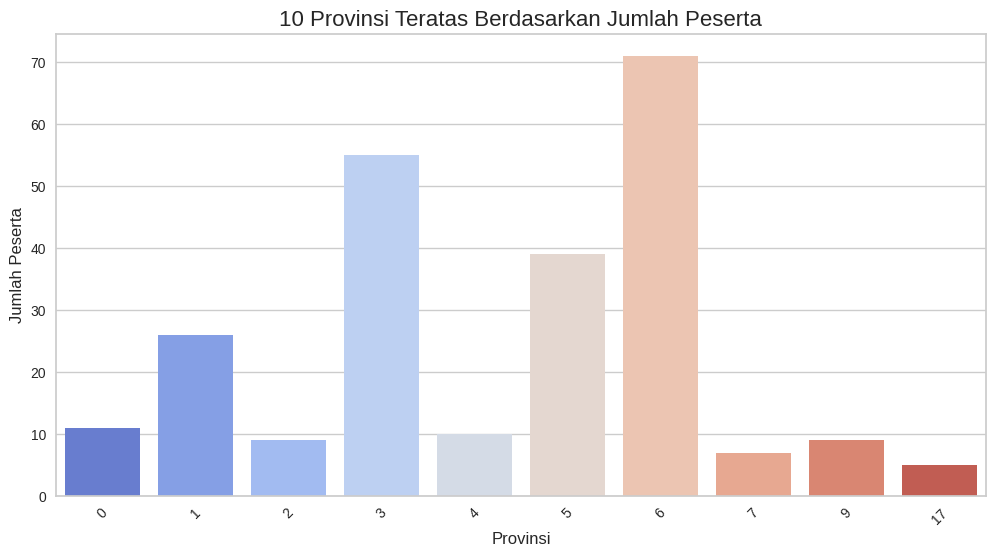

In [28]:
plt.figure(figsize=(12, 6))
top_provinsi = data['Provinsi'].value_counts().head(10)
sns.barplot(x=top_provinsi.index, y=top_provinsi.values, palette='coolwarm')
plt.title('10 Provinsi Teratas Berdasarkan Jumlah Peserta', fontsize=16)
plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Jumlah Peserta', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-29-3dd1f441e3dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medali_counts.index, y=medali_counts.values, palette='viridis')


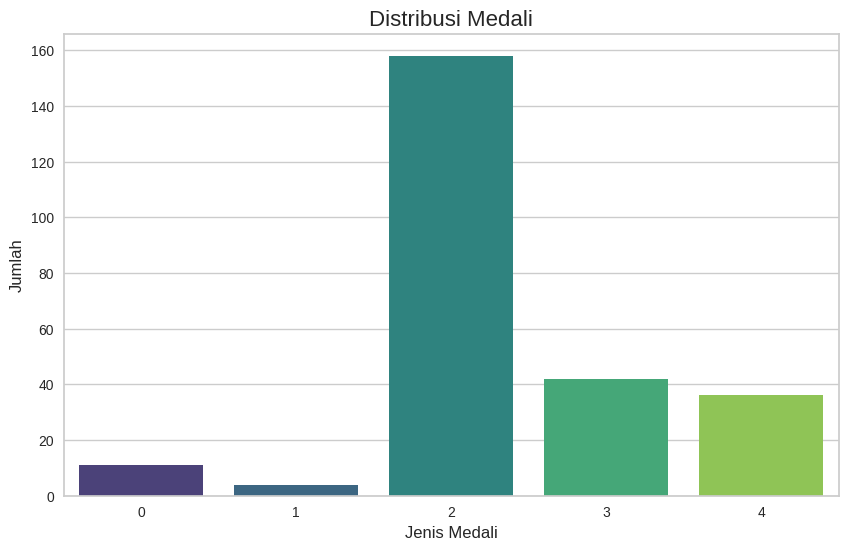

In [29]:
plt.figure(figsize=(10, 6))
medali_counts = data['Medali'].value_counts()
sns.barplot(x=medali_counts.index, y=medali_counts.values, palette='viridis')
plt.title('Distribusi Medali', fontsize=16)
plt.xlabel('Jenis Medali', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

In [30]:
X= data[['Provinsi','Medali']]
kmeans = KMeans( random_state=42)

kmeans.fit(X)

KMeans(random_state=42)

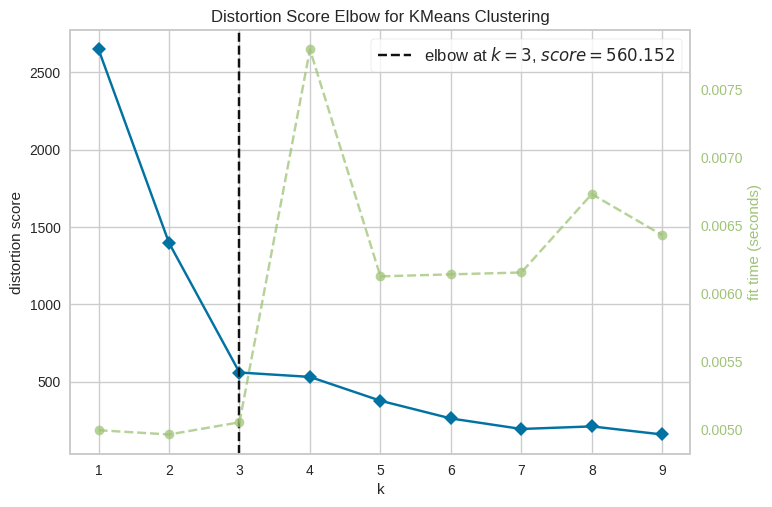

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1, 10))

visualizer.fit(X)

visualizer.show()

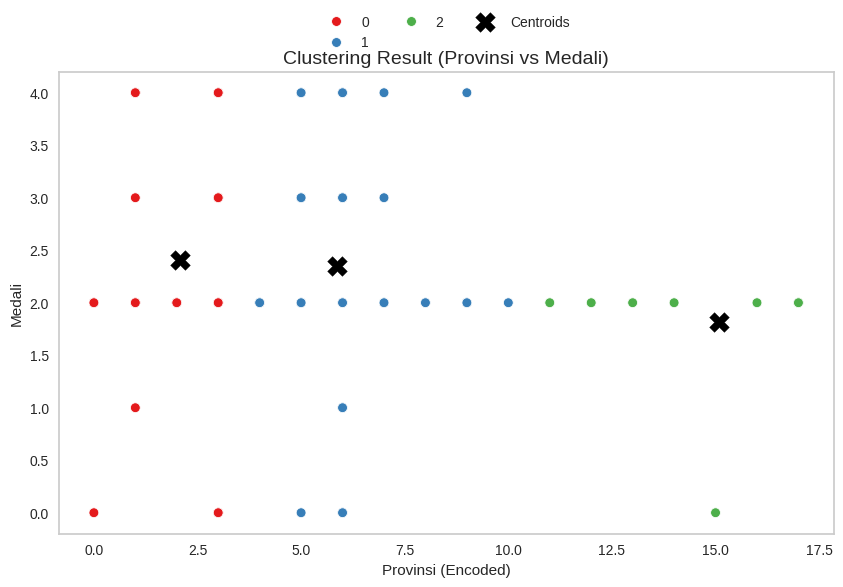

In [46]:
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X)

data['Cluster'] = kmeans.labels_

centroid = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Provinsi", y="Medali", hue="Cluster", palette="Set1",s=50)
plt.scatter(centroid[:, 0], centroid[:, 1], c="black", marker="X", s=200, label="Centroids")
plt.title("Clustering Result (Provinsi vs Medali)", fontsize=14)

plt.xlabel("Provinsi (Encoded)")
plt.ylabel("Medali")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.grid()
plt.show()

In [56]:
# Menampilkan pelanggan dalam Cluster 1
cluster_1 = data[data['Cluster'] == 0]  # Jika Cluster 1 adalah 0
print("Peserta dalam Cluster 1:")
print(cluster_1[['Nama Peserta', 'Provinsi', 'Medali']])

# Menampilkan pelanggan dalam Cluster 2
cluster_2 = data[data['Cluster'] == 1]  # Jika Cluster 2 adalah 1
print("\nPeserta dalam Cluster 2:")
print(cluster_2[['Nama Peserta', 'Provinsi', 'Medali']])

# Menampilkan pelanggan dalam Cluster
cluster_2 = data[data['Cluster'] == 2]  # Jika Cluster 3 adalah 2
print("\nPeserta dalam Cluster 3:")
print(cluster_2[['Nama Peserta', 'Provinsi', 'Medali']])

Peserta dalam Cluster 1:
                     Nama Peserta  Provinsi  Medali
1          Muhammad Khairul Ihsan         0       2
2                       Farhannur         0       0
3                Muhammad Fathoni         0       2
4                       Rahmat MI         0       2
5                  Salwatul Aziza         0       2
..                            ...       ...     ...
107        Muhammad Fulan Ardhani         3       2
108            Abdurraafi' Syauqy         3       3
109            Mubarok Alfa Rizqi         3       3
110  Muhammad Agil Wijaya Faradis         3       4
235                  Kim Hyo Jong         1       2

[101 rows x 3 columns]

Peserta dalam Cluster 2:
                         Nama Peserta  Provinsi  Medali
0                Gangsar Lintas Damai         9       2
6         Muhammad Ali Fadllur Rahman         9       2
20            Alvaro Zhafran Prananta         9       4
24           Berliana Bahiyaturrohmah         9       2
44                   

#5. Visualisasi Hasil Clustering

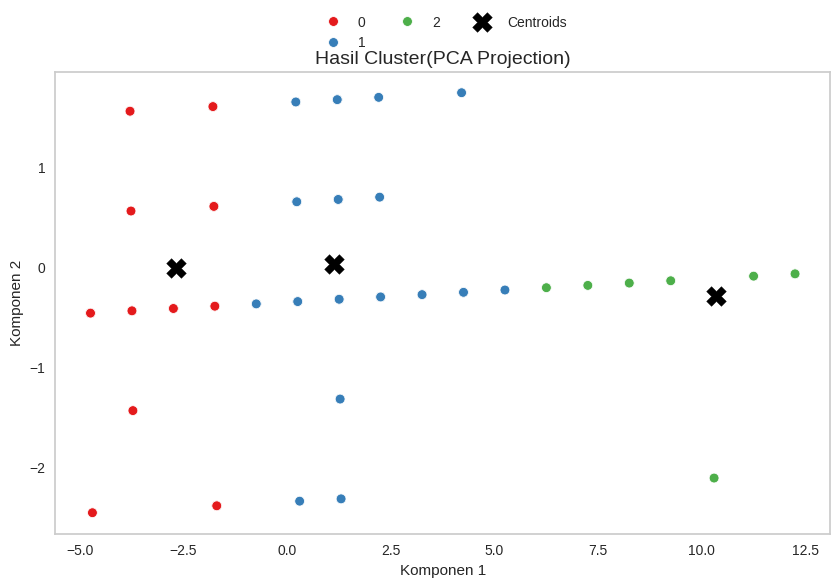

In [53]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(X_pca)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_pca.labels_, palette="Set1", s=50)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1],
            c="black", marker="X", s=200, label="Centroids")
plt.title("Hasil Cluster(PCA Projection)", fontsize=14)
plt.xlabel("Komponen 1")
plt.ylabel("Komponen 2")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.grid()
plt.show()